# Objectives
1. Perceptron Learning Algorithm <br>
2. Linear Regression <br>
3. Classification <br>

# Tools
You are allowed to use Python packages to help you solve the problems and plot any results for reference, including numpy, scipy, pandas and scikit-learn.<br> 
For optional problems, you may find matplotlib package useful.

## 1.Perceptron Learning Algorithm

In [20]:
from IPython.display import Image

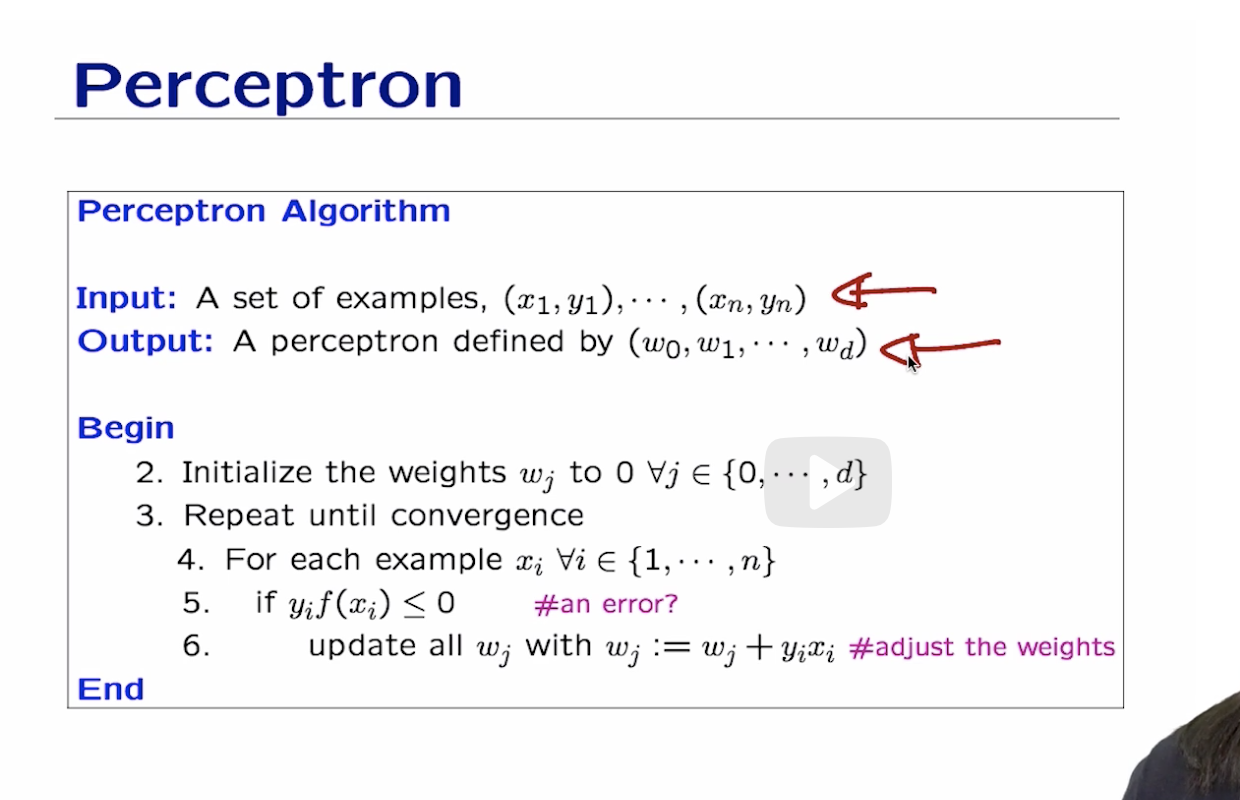

In [21]:
Image("img/Perceptron.png")

In [250]:
# problem1.py
import pandas as pd
import numpy as np
import sys

def f_func(w,x_i):
    d = 2
    f_sum = 0
    for j in range(d+1):
        f_sum+=x_i.iloc[j] * w[j]
    f = 1 if f_sum > 0 else -1
    return f 

def perceptron(input_fileName,ouput_fileName):
    data = pd.read_csv(input_fileName,names=[0,1,3])
    d = 2
    data.insert (3, d, [1] * len(data))
    err = [1] * len(data)
    b = 0
    w_1 = 0
    w_2 = 0
    w = [w_1, w_2, b]
    output = []
    while sum(err) != 0:
        for i, example in data.iterrows():
            x_i = example[range(d+1)]
            y_i = example[d+1]
            err[i] = 0
            if y_i * f_func(w,x_i) <= 0:
                w = [w[j] + x_i[j] * y_i for j in range(d+1)]  
                err[i] = 1
                output.append(w[:])
    output_df = pd.DataFrame(output)
    output_df.to_csv(ouput_fileName, encoding='utf-8', index=False, header=False)

def main():
    #input_fileName = sys.argv[1].lower()
    #ouput_fileName = sys.argv[2].lower()
    input_fileName = "input1.csv"
    ouput_fileName = "output1.csv"
    perceptron(input_fileName, ouput_fileName)

In [252]:
main()

## Linear Regression

In this problem, you will work on linear regression with multiple features using gradient descent.<br>
In your starter code, you will find input2.csv, containing a series of data points.<br>
Each point is a comma-separated ordered triple, representing age, weight, and height.<br>

In [123]:
# problem2.py
import pandas as pd
import numpy as np
import sys
def scalestd(data):
    data_mean = data.mean(axis = 0)
    data_std = data.std(axis = 0, ddof=0)
    data = (data - data_mean)/data_std
    return data

def getData(inputfileName):
    data = pd.read_csv(inputfileName,names=[1,2,3])
    n,_ = data.shape
    scaled_data = scalestd(data[[1,2]])
    scaled_data.insert (0, 0, [1] * n)
    scaled_data[3] = data[3]
    return scaled_data

def f(x_i, w):
    d = len(x_i)
    f_sum = 0
    f_sum=sum([x_i.iloc[j] * w[j] for j in range(d)])
    return f_sum

def descent(data, alpha, w):
    n,d = data.shape
    d = d - 1
    sumi = [0] * d
    for i, example in data.iterrows():
        indexs = list(range(d))
        x_i = example[indexs]
        y_i = example[d]
        diff = f(x_i, w) - y_i
        
        temp = (alpha/n) * diff
        sumi = [sumi[j] + temp * x_i.iloc[j] for j in range(d)] 
    return sumi

def err(data, w):
    n,d = data.shape
    d = d - 1
    sumi = 0
    for i, example in data.iterrows():
        indexs = list(range(d))
        x_i = example[indexs]
        y_i = example[d]
        diff = f(x_i, w) - y_i
        sumi+=diff
    sumi = sumi/2*n
    return sumi

def gradient_descent(alpha_set, n_iterations, data):
    n,d = data.shape
    d = d-1
    report=[]
    for alpha in alpha_set:
        print("Current Alpha:", alpha)
        err_set = []
        beta = [0] * d
        for i in range(n_iterations):
            descent_step = descent(data, alpha, beta)
            beta = [(beta[j] - descent_step[j]) for j in range(d)]
            err_set.append(abs(err(data, beta)))
        print("has minimon error in iteration: {}, the minimum error is {}, the last error value is {}".format(err_set.index(min(err_set)), min(err_set), err_set[-1]))          
        single_report = [alpha, n_iterations, beta[0],beta[1], beta[2]]
        report.append(single_report)
    return report

def main():
    #input_fileName = sys.argv[1].lower()
    #ouput_fileName = sys.argv[2].lower()
    input_fileName = "input2.csv"
    ouput_fileName = "output2.csv"
    scaled_data = getData(input_fileName)
    alpha_set = [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10]
    n_iterations = 100
    report = gradient_descent(alpha_set, n_iterations, scaled_data)
    alpha_set2 = [1.2]
    n_iterations = 32
    report.extend(gradient_descent(alpha_set2, n_iterations, scaled_data))
    report = pd.DataFrame(report)
    report.to_csv(ouput_fileName, encoding='utf-8', index=False, header=False)
    return report

In [124]:
main()

Current Alpha: 0.001
has minimon error in iteration: 99, the minimum error is 3095.751725675097, the last error value is 3095.751725675097
Current Alpha: 0.005
has minimon error in iteration: 99, the minimum error is 2072.6471600260797, the last error value is 2072.6471600260797
Current Alpha: 0.01
has minimon error in iteration: 99, the minimum error is 1252.3818379328713, the last error value is 1252.3818379328713
Current Alpha: 0.05
has minimon error in iteration: 99, the minimum error is 20.257126025272367, the last error value is 20.257126025272367
Current Alpha: 0.1
has minimon error in iteration: 99, the minimum error is 0.09087998465246183, the last error value is 0.09087998465246183
Current Alpha: 0.5
has minimon error in iteration: 66, the minimum error is 3.771427614651657e-13, the last error value is 4.2099657093785936e-13
Current Alpha: 1
has minimon error in iteration: 0, the minimum error is 6.139533326177116e-14, the last error value is 2.368105711525459e-13
Current Alp

,0,1,2,3,4
0,0.001,100,1.043917e-01,1.202819e-02,8.678100e-03
1,0.005,100,4.322573e-01,4.573320e-02,2.983411e-02
2,0.010,100,6.951207e-01,6.860855e-02,3.878004e-02
3,0.050,100,1.089969e+00,1.120069e-01,1.799780e-02
4,0.100,100,1.096432e+00,1.243621e-01,5.657641e-03
5,0.500,100,1.096461e+00,1.286172e-01,1.402522e-03
6,1.000,100,1.096461e+00,1.286172e-01,1.402484e-03
7,5.000,100,9.709117e+70,-1.857235e+87,-1.857235e+87
8,10.000,100,4.283905e+104,-1.306121e+120,-1.306121e+120
9,1.200,32,1.096461e+00,-6.298531e-01,-7.570673e-01


In [119]:
input_fileName = "input2.csv"
scaled_data = getData(input_fileName)
temp = list(range(2, 15, 1))
alpha_set2 = [a/10 for a in temp]
n_iterations = 100
gradient_descent(alpha_set2, n_iterations, scaled_data)

Current Alpha: 0.2
has minimon error in iteration: 99, the minimum error is 6.969731240480392e-07, the last error value is 6.969731240480392e-07
Current Alpha: 0.3
has minimon error in iteration: 99, the minimum error is 1.1708967129209213e-12, the last error value is 1.1708967129209213e-12
Current Alpha: 0.4
has minimon error in iteration: 88, the minimum error is 3.069766663088558e-13, the last error value is 3.990696662015125e-13
Current Alpha: 0.5
has minimon error in iteration: 66, the minimum error is 3.771427614651657e-13, the last error value is 4.2099657093785936e-13
Current Alpha: 0.6
has minimon error in iteration: 75, the minimum error is 3.727573805178963e-13, the last error value is 4.2099657093785936e-13
Current Alpha: 0.7
has minimon error in iteration: 36, the minimum error is 1.4471757125988916e-13, the last error value is 2.762789996779702e-13
Current Alpha: 0.8
has minimon error in iteration: 91, the minimum error is 1.8857138073258284e-13, the last error value is 2

[[0.2, 100, 1.096460811169052, 0.12835319174721813, 0.0016665244727177041],
 [0.3, 100, 1.0964608113924046, 0.12860210002145425, 0.0014176161984816033],
 [0.4, 100, 1.0964608113924048, 0.12861643508874288, 0.0014032811311929542],
 [0.5, 100, 1.0964608113924048, 0.12861719390874368, 0.0014025223111921667],
 [0.6, 100, 1.0964608113924048, 0.12861723063988761, 0.001402485580048231],
 [0.7, 100, 1.096460811392405, 0.12861723225668878, 0.0014024839632470682],
 [0.8, 100, 1.096460811392405, 0.1286172323210079, 0.0014024838989279446],
 [0.9, 100, 1.096460811392405, 0.12861723232330488, 0.0014024838966309842],
 [1.0, 100, 1.096460811392405, 0.12861723232337582, 0.0014024838965557376],
 [1.1, 100, 1.096460811392405, 0.1286136934165976, 0.0013989449897734102],
 [1.2, 100, 1.096460811392405, -140.2260524304983, -140.3532671789251],
 [1.3, 100, 1.0964608789118773, -409308538.50886166, -409308538.63607657],
 [1.4, 100, 1.1278527625588424, -173002487086268.56, -173002487086268.78]]

## Classification

In this problem you will use the support vector classifiers in the sklearn package to learn a classification model for a chessboard-like dataset. In your starter code, you will find input3.csv, containing a series of data points. Open the dataset in python. Make a scatter plot of the dataset showing the two classes with two different patterns.

Use SVM with different kernels to build a classifier. Make sure you split your data into training (60%) and testing (40%). Also make sure you use stratified sampling (i.e. same ratio of positive to negative in both the training and testing datasets). Use cross validation (with the number of folds k = 5) instead of a validation set. You do not need to scale/normalize the data for this question. Train-test splitting and cross validation functionalities are all readily available in sklearn.

* SVM with Linear Kernel. Observe the performance of the SVM with linear kernel. Search for a good setting of parameters to obtain high classification accuracy. Specifically, try values of C = [0.1, 0.5, 1, 5, 10, 50, 100]. Read about sklearn.grid_search and how this can help you accomplish this task. After locating the optimal parameter value by using the training data, record the corresponding best score (training data accuracy) achieved. Then apply the testing data to the model, and record the actual test score. Both scores will be a number between zero and one.
* SVM with Polynomial Kernel. (Similar to above).
Try values of C = [0.1, 1, 3], degree = [4, 5, 6], and gamma = [0.1, 0.5].
* SVM with RBF Kernel. (Similar to above).
Try values of C = [0.1, 0.5, 1, 5, 10, 50, 100] and gamma = [0.1, 0.5, 1, 3, 6, 10].
* Logistic Regression. (Similar to above).
Try values of C = [0.1, 0.5, 1, 5, 10, 50, 100].
* k-Nearest Neighbors. (Similar to above).
Try values of n_neighbors = [1, 2, 3, ..., 50] and leaf_size = [5, 10, 15, ..., 60].
* Decision Trees. (Similar to above).
Try values of max_depth = [1, 2, 3, ..., 50] and min_samples_split = [2, 3, 4, ..., 10].
* Random Forest. (Similar to above).
Try values of max_depth = [1, 2, 3, ..., 50] and min_samples_split = [2, 3, 4, ..., 10].


In [189]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import learning_curve, GridSearchCV

In [190]:
def SVM_Linear_Kernel(inputfile):
    X_train, X_test, y_train, y_test = getData(inputfile)
    parameters = {'kernel':['linear'], 'C':[0.1, 0.5, 1, 5, 10, 50, 100]}
    svr = svm.SVC()
    clf = GridSearchCV(svr, parameters, cv = 5, scoring="accuracy")    
    clf.fit(X_train, y_train)
    train_score = clf.score(X_train, y_train)
    test_score = clf.score(X_test, y_test)
    print("clf:\n", clf.best_estimator_.get_params())
    print("train_score:\n", train_score)
    print("test_score:\n", test_score)
    return train_score,test_score

def SVM_Polynomial_Kernel(inputfile):
    X_train, X_test, y_train, y_test = getData(inputfile)
    parameters = {'kernel':['poly'], 'C':[0.1, 1, 3], 'degree':[4, 5, 6], 'gamma':[0.1, 0.5]}
    svr = svm.SVC()
    clf = GridSearchCV(svr, parameters, cv = 5, scoring="accuracy")    
    clf.fit(X_train, y_train)
    train_score = clf.score(X_train, y_train)
    test_score = clf.score(X_test, y_test)
    print("clf:\n", clf.best_estimator_.get_params())
    print("train_score:\n", train_score)
    print("test_score:\n", test_score)
    return train_score,test_score

def SVM_RBF_Kernel(inputfile):
    X_train, X_test, y_train, y_test = getData(inputfile)
    parameters = {'kernel':['rbf'], 'C':[0.1, 0.5, 1, 5, 10, 50, 100], 'gamma':[0.1, 0.5, 1, 3, 6, 10]}
    svr = svm.SVC()
    clf = GridSearchCV(svr, parameters, cv = 5, scoring="accuracy")    
    clf.fit(X_train, y_train)
    train_score = clf.score(X_train, y_train)
    test_score = clf.score(X_test, y_test)
    print("clf:\n", clf.best_estimator_.get_params())
    print("train_score:\n", train_score)
    print("test_score:\n", test_score)
    return train_score,test_score

def Logistic_Regression(inputfile):
    X_train, X_test, y_train, y_test = getData(inputfile)
    parameters = {'C':[0.1, 0.5, 1, 5, 10, 50, 100]}
    logistic = LogisticRegression()
    clf = GridSearchCV(logistic, parameters, cv = 5, scoring="accuracy")    
    clf.fit(X_train, y_train)
    train_score = clf.score(X_train, y_train)
    test_score = clf.score(X_test, y_test)
    print("clf:\n", clf.best_estimator_.get_params())
    print("train_score:\n", train_score)
    print("test_score:\n", test_score)
    return train_score,test_score

def KNN(inputfile):
    X_train, X_test, y_train, y_test = getData(inputfile)
    n_neighbors = list(range(1,51,1))
    leaf_size = list(range(50,61,5))
    parameters = {'n_neighbors':n_neighbors, 'leaf_size':leaf_size}
    kn = KNeighborsClassifier()
    clf = GridSearchCV(kn, parameters, cv = 5, scoring="accuracy")    
    clf.fit(X_train, y_train)
    train_score = clf.score(X_train, y_train)
    test_score = clf.score(X_test, y_test)
    print("clf:\n", clf.best_estimator_.get_params())
    print("train_score:\n", train_score)
    print("test_score:\n", test_score)
    return train_score,test_score

def Desicion_Tree(inputfile):
    X_train, X_test, y_train, y_test = getData(inputfile)
    max_depth = list(range(1,51,1))
    min_samples_split = list(range(2,11,1))
    parameters = {'max_depth':max_depth, 'min_samples_split':min_samples_split}
    dt = DecisionTreeClassifier()
    clf = GridSearchCV(dt, parameters, cv = 5, scoring="accuracy")    
    clf.fit(X_train, y_train)
    train_score = clf.score(X_train, y_train)
    test_score = clf.score(X_test, y_test)
    print("clf:\n", clf.best_estimator_.get_params())
    print("train_score:\n", train_score)
    print("test_score:\n", test_score)
    return train_score,test_score

def Random_Forest(inputfile):
    X_train, X_test, y_train, y_test = getData(inputfile)
    max_depth = list(range(1,51,1))
    min_samples_split = list(range(2,11,1))
    parameters = {'max_depth':max_depth, 'min_samples_split':min_samples_split}
    rf = RandomForestClassifier()
    clf = GridSearchCV(rf, parameters, cv = 5, scoring="accuracy")    
    clf.fit(X_train, y_train)
    train_score = clf.score(X_train, y_train)
    test_score = clf.score(X_test, y_test)
    print("clf:\n", clf.best_estimator_.get_params())
    print("train_score:\n", train_score)
    print("test_score:\n", test_score)
    return train_score,test_score

In [195]:
def getData(inputfile):
    data = pd.read_csv(inputfile)
    X = data[['A', 'B']]
    y = data[['label']]
    X = X.to_numpy()
    y = y.to_numpy().ravel()
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=42)
    return X_train, X_test, y_train, y_test

[['svm_polynomial', 0.7233333333333334, 0.72],
 ['svm_rbf', 0.98, 0.98],
 ['logistic', 0.6066666666666667, 0.565],
 ['knn', 0.95, 0.915]]

In [198]:
report = []
train_score,test_score = SVM_Linear_Kernel('input3.csv')
report.append(['svm_linear', train_score, test_score])

train_score,test_score = SVM_Polynomial_Kernel('input3.csv')
report.append(['svm_polynomial', train_score, test_score])

train_score,test_score = SVM_RBF_Kernel('input3.csv')
report.append(['svm_rbf', train_score, test_score])

train_score,test_score = Logistic_Regression('input3.csv')
report.append(['logistic', train_score, test_score])

train_score,test_score = KNN('input3.csv')
report.append(['knn', train_score, test_score])

train_score,test_score = Desicion_Tree('input3.csv')
report.append(['decision_tree', train_score, test_score])

train_score,test_score = Random_Forest('input3.csv')
report.append(['random_forest', train_score, test_score])

report = pd.DataFrame(report)
report.to_csv('output3.csv', encoding='utf-8', index=False, header=False)

clf:
 {'C': 0.1, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'scale', 'kernel': 'linear', 'max_iter': -1, 'probability': False, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}
train_score:
 0.6066666666666667
test_score:
 0.565
clf:
 {'C': 1, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 5, 'gamma': 0.5, 'kernel': 'poly', 'max_iter': -1, 'probability': False, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}
train_score:
 0.7233333333333334
test_score:
 0.72
clf:
 {'C': 50, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 1, 'kernel': 'rbf', 'max_iter': -1, 'probability': False, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}
train_score:
 0.98
test_score:
 0.98
clf:
 {'C':

In [199]:
report

,0,1,2
0,svm_linear,0.606667,0.565
1,svm_polynomial,0.723333,0.720
2,svm_rbf,0.980000,0.980
3,logistic,0.606667,0.565
4,knn,0.950000,0.915
5,decision_tree,1.000000,0.995
6,random_forest,1.000000,0.975
